In [1]:
#importing libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# sklearn models 
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# model evaluation
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import confusion_matrix,f1_score,precision_score
from sklearn.metrics import classification_report,recall_score
from sklearn.metrics import RocCurveDisplay

In [2]:
# importing data 
df = pd.read_csv("sklearn_data/heart-disease.csv")
df.shape

(303, 14)

In [3]:
# Data Exploration (EDA)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [5]:
#  heart disease frequency according to age 
df["sex"].value_counts()

sex
1    207
0     96
Name: count, dtype: int64

In [6]:
#  compare target column with sex column in crosstab
pd.crosstab(df.target,df.sex)

sex,0,1
target,,
0,24,114
1,72,93


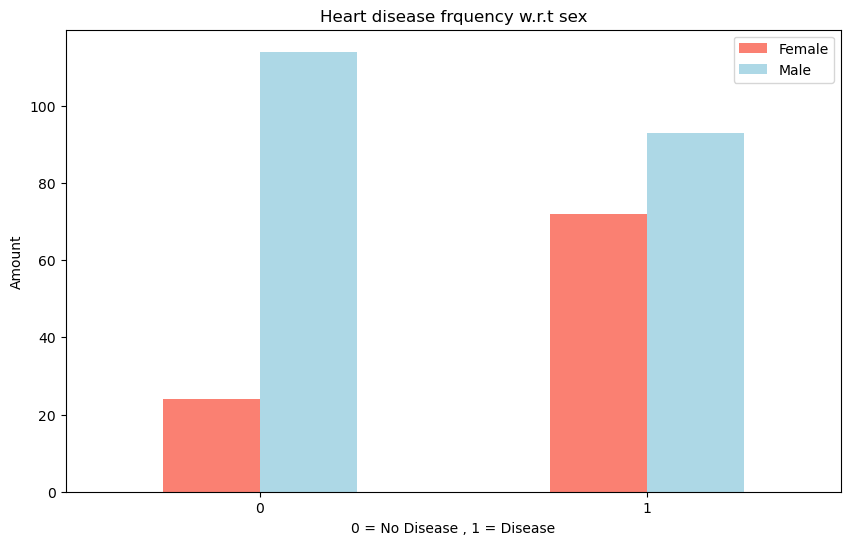

In [7]:
pd.crosstab(df.target,df.sex).plot(kind = "bar",
                                  figsize =(10,6),
                                  color = ["salmon","lightblue"]);
plt.title("Heart disease frquency w.r.t sex")
plt.xlabel("0 = No Disease , 1 = Disease")
plt.ylabel("Amount")
plt.legend(["Female","Male"])
plt.xticks(rotation = 0);

# Age vs Max heart rate for heart disease

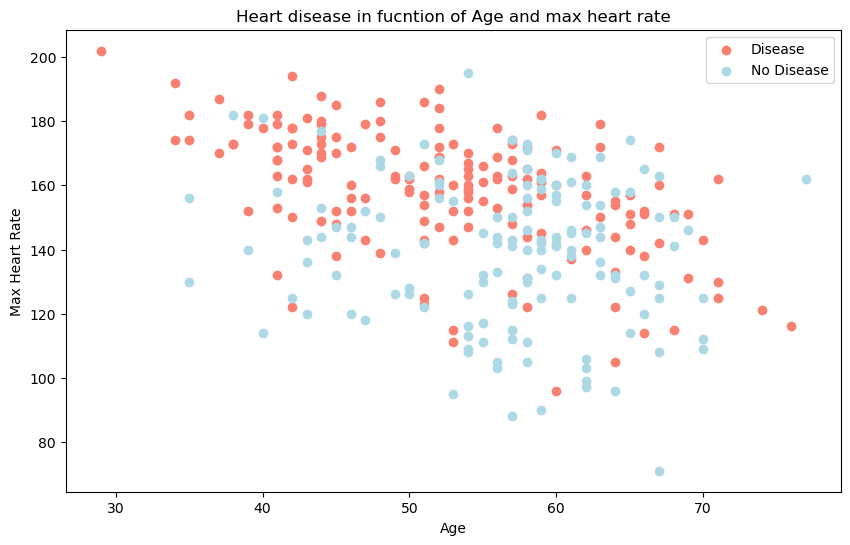

In [8]:
#  creating another figure 
plt.figure(figsize = (10,6))

# Scatter with positive example 
plt.scatter(df.age[df.target==1],
           df.thalach[df.target==1],
           color = "salmon");

#  scatter with negativw example 
plt.scatter(df.age[df.target==0],
           df.thalach[df.target==0],
           color = "lightblue");

# add some helpful info
plt.title("Heart disease in fucntion of Age and max heart rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease","No Disease"])

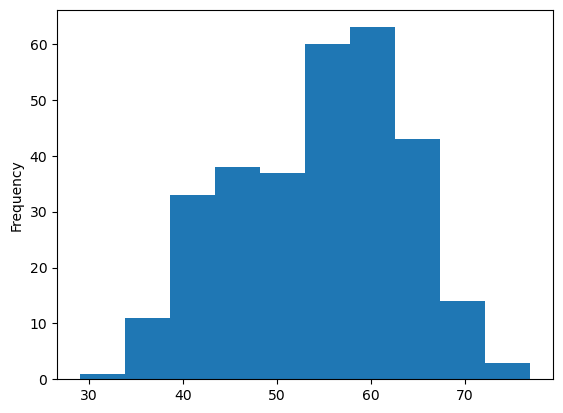

In [9]:
#  Checking distribution of age coulmn in histogram
df.age.plot.hist();

In [10]:
# Heart disease  related to cp (chest pain)
pd.crosstab(df.cp,df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


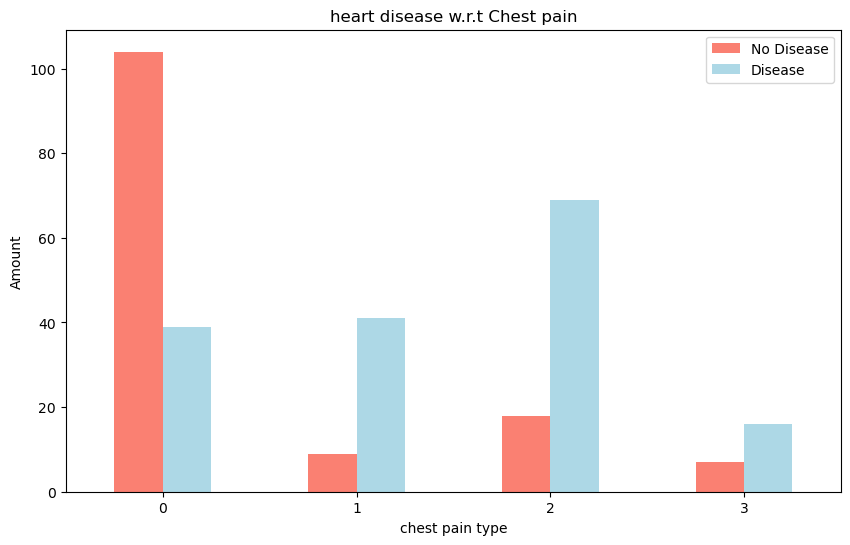

In [11]:
#  Visualize it 
pd.crosstab(df.cp,df.target).plot(kind = "bar",
                                 figsize = (10,6),
                                 color = ["salmon","lightblue"])

plt.title("heart disease w.r.t Chest pain")
plt.xlabel("chest pain type")
plt.ylabel("Amount")
plt.legend(["No Disease","Disease"])
plt.xticks(rotation = 0);

In [12]:
# MAKING A CORRELATION MATRIX 
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


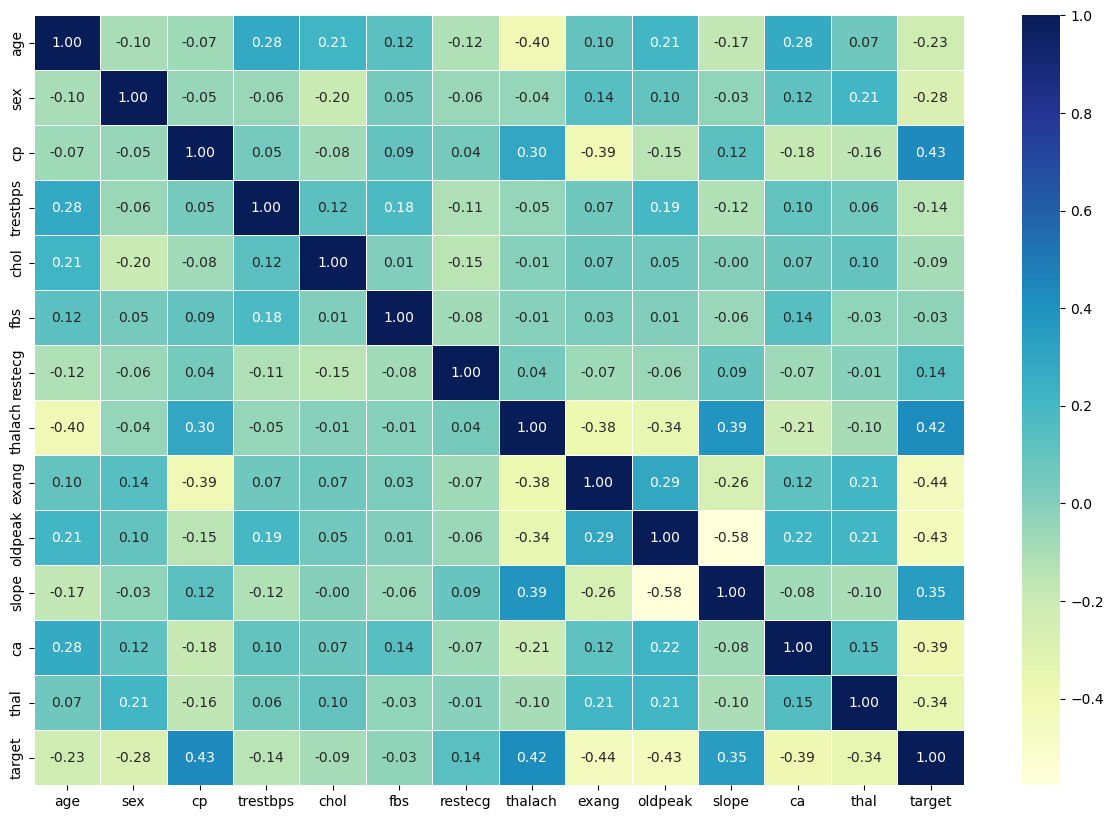

In [13]:
#  plotting into seaborn heatmap 
corr_matrix = df.corr()
fig,ax = plt.subplots(figsize = (15,10))
ax = sns.heatmap(corr_matrix, 
                annot = True,
                linewidths=0.5,
                fmt =".2f",
                cmap = "YlGnBu")

   

# applying models 
1) linear svc
2) KN-Neighbour 
3) RandomForestClassifiers

In [29]:

#  split into features and labels
x= df.drop("target" , axis=1)
y =df["target"]

# split into train and test
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)

# model names 

models = {"Linear Svc " :LogisticRegression(),
          "KNN" :KNeighborsClassifier(),
          "Random Forest" :RandomForestClassifier()}


In [30]:
#  craeting a function for fit and score 
def fit_and_score(models ,X_train,X_test,Y_train,Y_test):
    # set random seed 
    np.random.seed(42)
    # making dictionary of model score
    model_score = {}
    # loop through models 
    for name,model in models.items():
        # fit the model 
        model.fit(X_train,Y_train)
        # Evaluating model score 
        model_score[name] = model.score(x_test,y_test)
    return model_score



In [31]:
model_score = fit_and_score(models = models,X_train = x_train,X_test = x_test,Y_train = y_train,Y_test = y_test)

model_score

/home/al1_nasir/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Linear Svc ': 0.8688524590163934,
 'KNN': 0.6557377049180327,
 'Random Forest': 0.7868852459016393}

# model_comparison

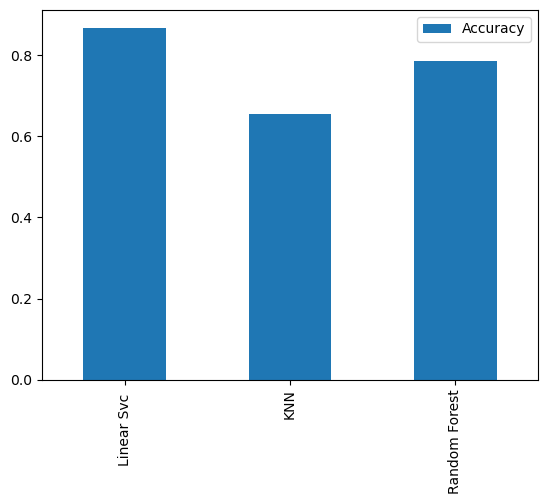

In [32]:
model_compare = pd.DataFrame(model_score,index = ["Accuracy"])
model_compare.T.plot.bar();

# Now we have made baseline model ,, we will improve it

lets look at 
* hyperparameter tuning 
* Feature importance 
*confusion matrix 
* cross validation
*precision 
*accuracy 
* f1 score
* classification report 
* roc curve
* area under curve auc 


## Hyper parameter tuning

In [33]:
# Lets tune KNN 
train_score= []
test_score = []
#  create a list of differerent values for n neighbours 
neighbors  = range(1,21)

# setup KNN instance 
knn = KNeighborsClassifier()

#  loop through different values 
for i in neighbors: 
    knn.set_params(n_neighbors  = i )
    
    # fit the algo 
    knn.fit(x_train,y_train)
    
    # update teh training score 
    train_score.append(knn.score(x_train,y_train))
    #update test score 
    test_score.append(knn.score(x_test,y_test))
    

In [34]:
train_score

[1.0,
 0.8223140495867769,
 0.8016528925619835,
 0.78099173553719,
 0.7727272727272727,
 0.7644628099173554,
 0.7396694214876033,
 0.7272727272727273,
 0.7148760330578512,
 0.7148760330578512,
 0.7148760330578512,
 0.6983471074380165,
 0.7024793388429752,
 0.7066115702479339,
 0.6859504132231405,
 0.6983471074380165,
 0.7024793388429752,
 0.7024793388429752,
 0.6942148760330579,
 0.6942148760330579]

In [35]:
test_score


[0.4262295081967213,
 0.5245901639344263,
 0.639344262295082,
 0.6229508196721312,
 0.6557377049180327,
 0.6557377049180327,
 0.6885245901639344,
 0.639344262295082,
 0.6065573770491803,
 0.6065573770491803,
 0.6229508196721312,
 0.6065573770491803,
 0.6229508196721312,
 0.5737704918032787,
 0.6065573770491803,
 0.5901639344262295,
 0.6065573770491803,
 0.5901639344262295,
 0.6229508196721312,
 0.6065573770491803]

Maximum KNN score on test data : 68.85%


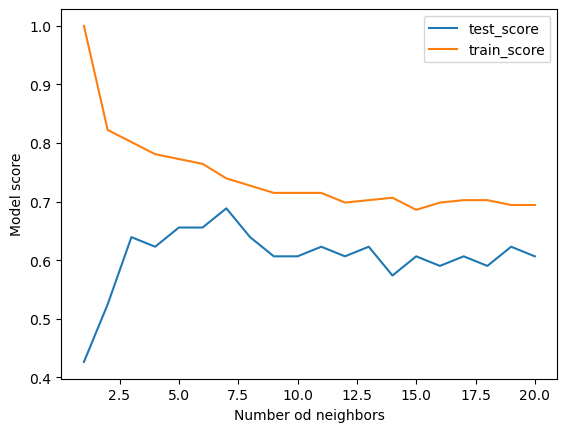

In [36]:
plt.plot(neighbors,test_score,label = "test_score")
plt.plot(neighbors,train_score,label = "train_score")

plt.xlabel("Number od neighbors")
plt.ylabel("Model score")
plt.legend()

print(f"Maximum KNN score on test data : {max(test_score)*100:.2f}%")

#  Hyperparameter tuning with randomized search cv

we are going to tune 


logistic regression and  random forest classifiers using randomsearchcv

In [37]:
#  Create a hyperparameter grid for Logistic Regression 
log_reg_grid = {"C":np.logspace(-4,4,20),
               "solver":["liblinear"]
               }

# create a hyperoarametere grid for random fores classifiers
rf_grid = {"n_estimators" : np.arange(10,1000,50),
           "max_depth" : [None,3,5,10],
           "min_samples_split": np.arange(2,20,2),
           "min_samples_leaf": np.arange(1,20,2)}


In [38]:
# tune logistic regression

np.random.seed(42)
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                               param_distributions=log_reg_grid,
                               cv=5,
                               n_iter=20,
                               verbose=True)
rs_log_reg.fit(x_train,y_train)
rs_log_reg.score(x_test,y_test)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


0.8524590163934426

In [39]:
#  Tune random forest classifiers

np.random.seed(42)

rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                          param_distributions=rf_grid,
                          cv=5, 
                          n_iter=20,
                          verbose=True)
rs_rf.fit(x_train,y_train)


Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [40]:
rs_rf.best_params_

{'n_estimators': 460,
 'min_samples_split': 6,
 'min_samples_leaf': 9,
 'max_depth': None}

In [41]:
rs_rf.score(x_test,y_test)

0.8032786885245902

In [42]:
model_score

{'Linear Svc ': 0.8688524590163934,
 'KNN': 0.6557377049180327,
 'Random Forest': 0.7868852459016393}

#  GRID SEARCH CV Hyper parameters tuning

improving Linear_search Logestic regression 

In [43]:
#  Creaing grid  
log_reg_grid = {"C": np.logspace(-4,4,30),
               "solver": ["liblinear"]}

# applying grid search for logistic regression
gs_log_reg  = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                            cv =5 ,
                           verbose =True
                          )
gs_log_reg.fit(x_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [45]:
gs_log_reg.score(x_test,y_test)

0.8688524590163934

# evaluating tuned model classifiers beyond accuracy 
* ROC Curve and AUc

In [47]:
# Make prediction with tuned model 
y_preds = gs_log_reg.predict(x_test)

y_preds

array([0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1])

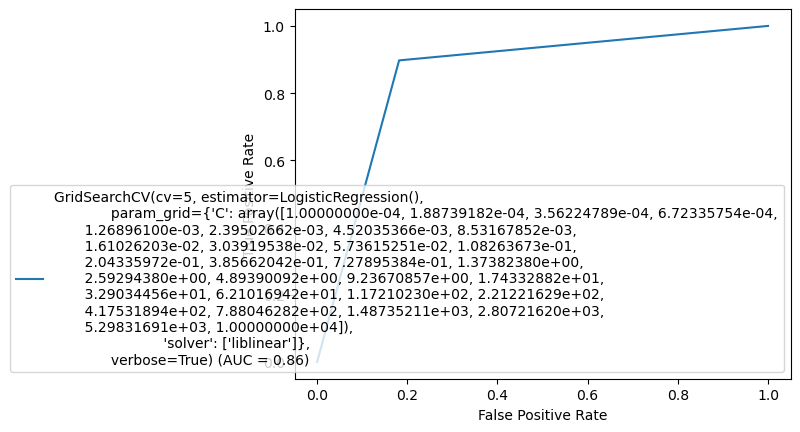

In [63]:
# import roc curve function
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import roc_curve
from sklearn.metrics  import auc
fpr,tpr,threshold = roc_curve(y_preds,y_test)
roc_auc = auc(fpr, tpr)


d= RocCurveDisplay(fpr = fpr,tpr = tpr,roc_auc= roc_auc,
                          estimator_name=gs_log_reg)
d.plot()

In [64]:
# Confusion matrix 
confusion_matrix(y_test,y_preds)

array([[18,  4],
       [ 4, 35]])

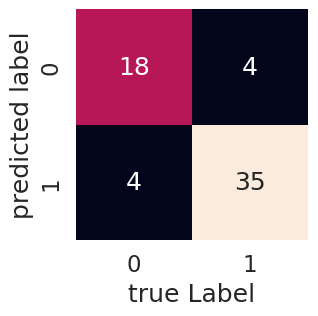

In [68]:
sns.set(font_scale =1.5) 

def plot_conf_mat(y_test , y_preds):
    fig,ax = plt.subplots(figsize = (3,3))
    ax = sns.heatmap(confusion_matrix(y_test,y_preds),
                    annot = True,cbar= False)
    plt.xlabel("true Label")
    plt.ylabel("predicted label")
    
plot_conf_mat(y_test,y_preds)    

In [70]:
print(classification_report(y_preds,y_test))

              precision    recall  f1-score   support

           0       0.82      0.82      0.82        22
           1       0.90      0.90      0.90        39

    accuracy                           0.87        61
   macro avg       0.86      0.86      0.86        61
weighted avg       0.87      0.87      0.87        61



#  Calculate evaluation metric using cross validation 

In [71]:
# check best hyper paramter \
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [73]:
gs_log_reg.score(x_test,y_test)

0.8688524590163934

In [82]:
# created a classifier with best parameters
clf = LogisticRegression(C = 0.20433597178569418,
                        solver = "liblinear")


In [87]:
# Cross validation accuaracy

cv_acc = cross_val_score(clf,
                        x , 
                        y, 
                        cv =5, 
                        scoring="accuracy")
cv_acc

array([0.81967213, 0.90163934, 0.86885246, 0.88333333, 0.75      ])

In [88]:
cv_acc = np.mean(cv_acc)
cv_acc

0.8446994535519124

In [89]:
# Cross validation precision

cv_pre = cross_val_score(clf,
                        x , 
                        y, 
                        cv =5, 
                        scoring="precision")
cv_pre

array([0.775     , 0.88571429, 0.85714286, 0.86111111, 0.725     ])

In [91]:
cv_pre =np.mean(cv_pre)
cv_pre

0.8207936507936507

In [92]:
# cross validation f2
cv_f1 = cross_val_score(clf,
                        x , 
                        y, 
                        cv =5, 
                        scoring="f1")
cv_f1

array([0.84931507, 0.91176471, 0.88235294, 0.89855072, 0.79452055])

In [94]:
cv_f1 = np.mean(cv_f1)
cv_f1

0.8673007976269721

In [95]:
# cross validation recal
cv_rec = cross_val_score(clf,
                        x , 
                        y, 
                        cv =5, 
                        scoring="recall")
cv_rec

array([0.93939394, 0.93939394, 0.90909091, 0.93939394, 0.87878788])

In [97]:
cv_rec = np.mean(cv_rec)
cv_rec

0.9212121212121213

<Axes: title={'center': 'Cross validation classification metrics'}>

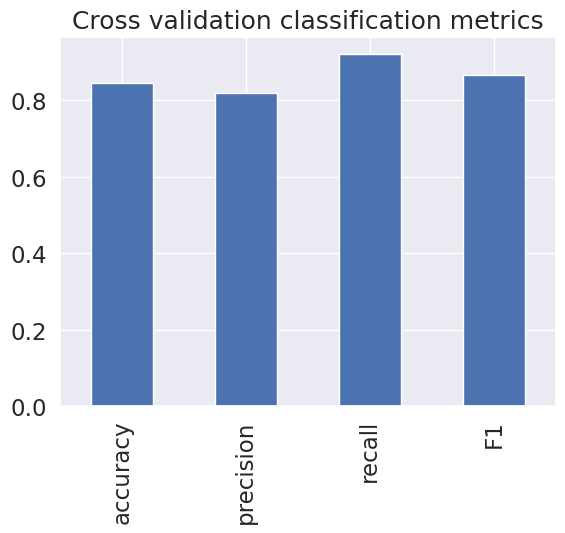

In [105]:
cv_metrics=pd.DataFrame({"accuracy":cv_acc,
                        "precision":cv_pre,
                         "recall":cv_rec,
                         "F1":cv_f1
                        },
                       index=[0])
cv_metrics.T.plot.bar(title = "Cross validation classification metrics",legend = False
                     )

In [ ]:
# Finding 